In [1]:
%run ../../main.py
%matplotlib inline

In [2]:
from pyarc import CBA
from pyarc.algorithms import generateCARs, M1Algorithm, M2Algorithm
from pyarc.algorithms import createCARs



import matplotlib.pyplot as plt
import matplotlib.patches as patches

from itertools import combinations

import itertools
import pandas as pd
import numpy
import re

movies = pd.read_csv("../data/movies.csv", sep=";")
movies_discr = movies.copy(True)



budget_bins = range(0, 350, 50)
budget_bins_names = [ "<{0};{1})".format(i, i + 50) for i in budget_bins[:-1] ]

celebrities_bins = range(0, 10, 2)
celebrities_bins_names = [ "<{0};{1})".format(i, i + 2) for i in celebrities_bins[:-1] ]

movies_discr['estimated-budget'] = pd.cut(movies['estimated-budget'], budget_bins, labels=budget_bins_names)
movies_discr['a-list-celebrities'] = pd.cut(movies['a-list-celebrities'], celebrities_bins, labels=celebrities_bins_names)

movies_discr.to_csv("../data/movies_discr.csv", sep=";")

transactionDB = TransactionDB.from_DataFrame(movies_discr, unique_transactions=True)

rules = generateCARs(transactionDB, support=5, confidence=50)

movies_vals = movies.get_values()


x = range(0, 350, 50)
y = range(1, 9)


x_points = list(map(lambda n: n[0], movies_vals))
y_points = list(map(lambda n: n[1], movies_vals))
data_class = list(movies['class'])
appearance = {
    'box-office-bomb': ('brown', "o"),
    'main-stream-hit': ('blue', "o"),
    'critical-success': ('green', "o")
}
rule_appearance = {
    'box-office-bomb': 'tan',
    'main-stream-hit': 'aqua',
    'critical-success': 'lightgreen'
}


plt.style.use('seaborn-white')
rules

len(transactionDB)

35

In [3]:
def plot_rule(rule, plt):
    interval_regex = "<(\d+);(\d+)\)"
    
    lower_y = 0
    area_y = celebrities_bins[-1]
    
    lower_x = 0
    area_x = budget_bins[-1]
    
    
    
    
    if len(rule.antecedent) != 0:
        if rule.antecedent[0][0] == "a-list-celebrities":
            y = rule.antecedent[0]
            y_boundaries = re.search(interval_regex, y[1])
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = rule.antecedent[0]
            x_boundaries = re.search(interval_regex, x[1])
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
        
    if len(rule.antecedent) > 1:
        if rule.antecedent[1][0] == "a-list-celebrities":
            y = rule.antecedent[1]
            y_boundaries = re.search(interval_regex, y[1])
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = rule.antecedent[1]
            x_boundaries = re.search(interval_regex, x[1])
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
            
    
    axis = plt.gca()

    class_name = rule.consequent[1]
    
    axis.add_patch(
       patches.Rectangle((lower_x, lower_y), area_x, area_y, zorder=-2, facecolor=rule_appearance[class_name], alpha=rule.confidence)
    )


rule count 21


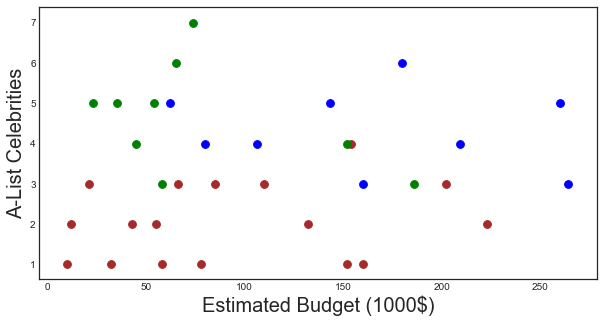

In [4]:
plt.figure(figsize=(10, 5))

# data cases
for i in range(len(x_points)):
    plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)


    
plt.xlabel('Estimated Budget (1000$)', fontsize=20)
plt.ylabel('A-List Celebrities', fontsize=20)



plt.savefig("../data/datacases.png")

print("rule count", len(rules))

In [5]:
movies_discr.head()

,estimated-budget,a-list-celebrities,class
0,<150;200),<0;2),box-office-bomb
1,<50;100),<0;2),box-office-bomb
2,<50;100),<0;2),box-office-bomb
3,<50;100),<2;4),box-office-bomb
4,<200;250),<0;2),box-office-bomb


rule count 21


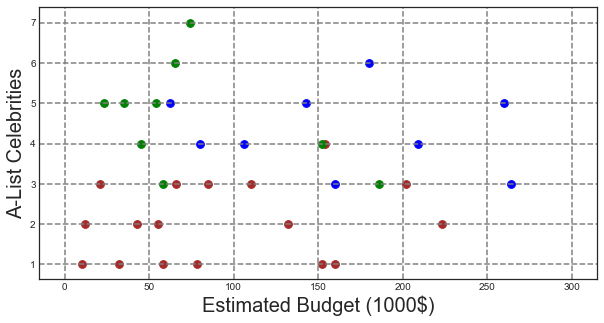

In [6]:
plt.figure(figsize=(10, 5))

# data cases
for i in range(len(x_points)):
    plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)


# rule boundary lines
for i, n in enumerate(x):
    plt.axhline(y=y[i], color = "grey", linestyle="dashed")
    plt.axvline(x=x[i], color = "grey", linestyle="dashed")

    
    
plt.xlabel('Estimated Budget (1000$)', fontsize=20)
plt.ylabel('A-List Celebrities', fontsize=20)



plt.savefig("../data/datacases_discr.png")

print("rule count", len(rules))

In [7]:
from matplotlib2tikz import save as tikz_save

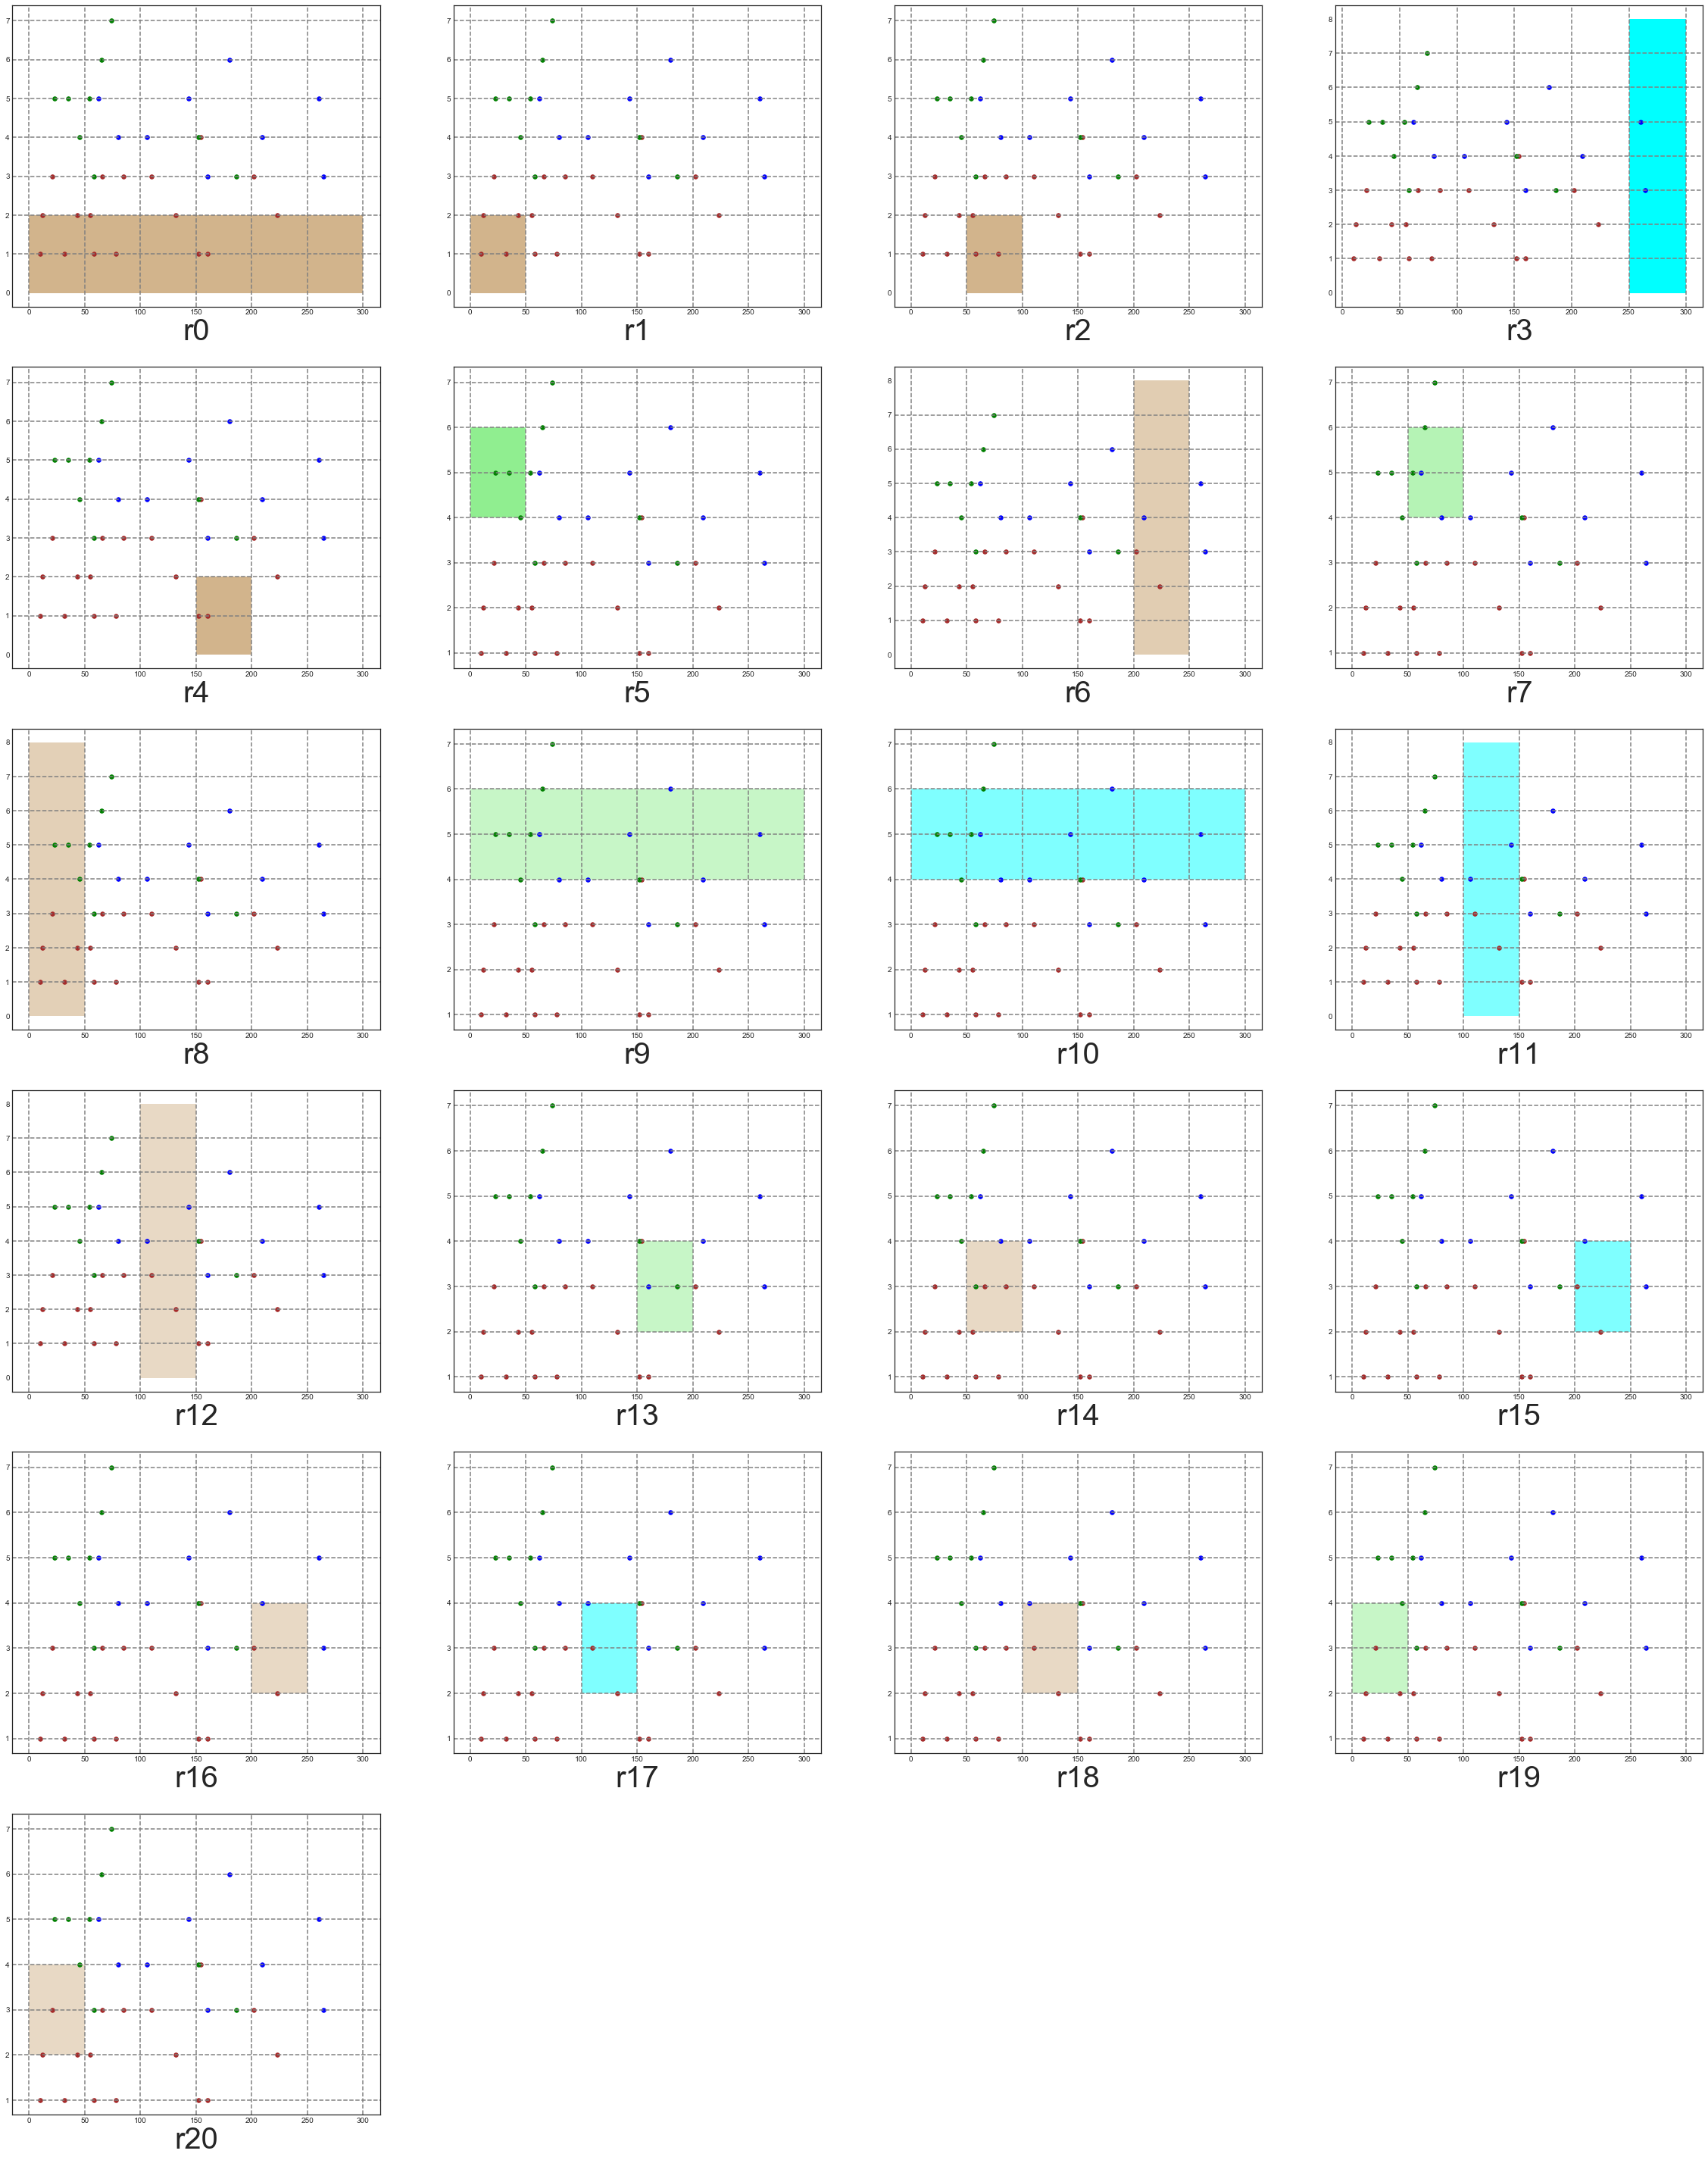

In [8]:
subplot_count = 1
plt.style.use("seaborn-white")

fig, ax = plt.subplots(figsize=(40, 60))

ax.set_xlabel('Estimated Budget (1000$)')
ax.set_ylabel('A-List Celebrities')

for idx, r in enumerate(sorted(rules, reverse=True)):
    plt.subplot(7, 4, idx + 1)
    plot_rule(r, plt)
    
    # data cases
    for i in range(len(x_points)):
        plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=30)

    # rule boundary lines
    for i, n in enumerate(x):
        plt.axhline(y=y[i], color = "grey", linestyle="dashed")
        plt.axvline(x=x[i], color = "grey", linestyle="dashed")
        
        
    plt.xlabel("r{}".format(idx), fontsize=40)
        
        
plt.savefig("../data/rule_plot.png")



In [9]:
print(len(transactionDB))
clfm1 = M1Algorithm(rules, transactionDB).build()
print(len(clfm1.rules))
clfm1 = M1Algorithm(rules, transactionDB).build()
print(len(clfm1.rules))
clfm1 = M1Algorithm(rules, transactionDB).build()
print(len(clfm1.rules))

35
10
10
10


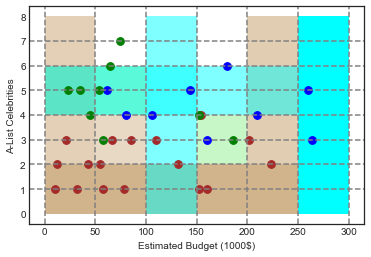

In [10]:
clf = M1Algorithm(rules, transactionDB).build()

for r in clf.rules:
    plot_rule(r, plt)

# data cases
for i in range(len(x_points)):
    plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)


# rule boundary lines
for i, n in enumerate(x):
    plt.axhline(y=y[i], color = "grey", linestyle="dashed")
    plt.axvline(x=x[i], color = "grey", linestyle="dashed")

    
    
plt.xlabel('Estimated Budget (1000$)')
plt.ylabel('A-List Celebrities')


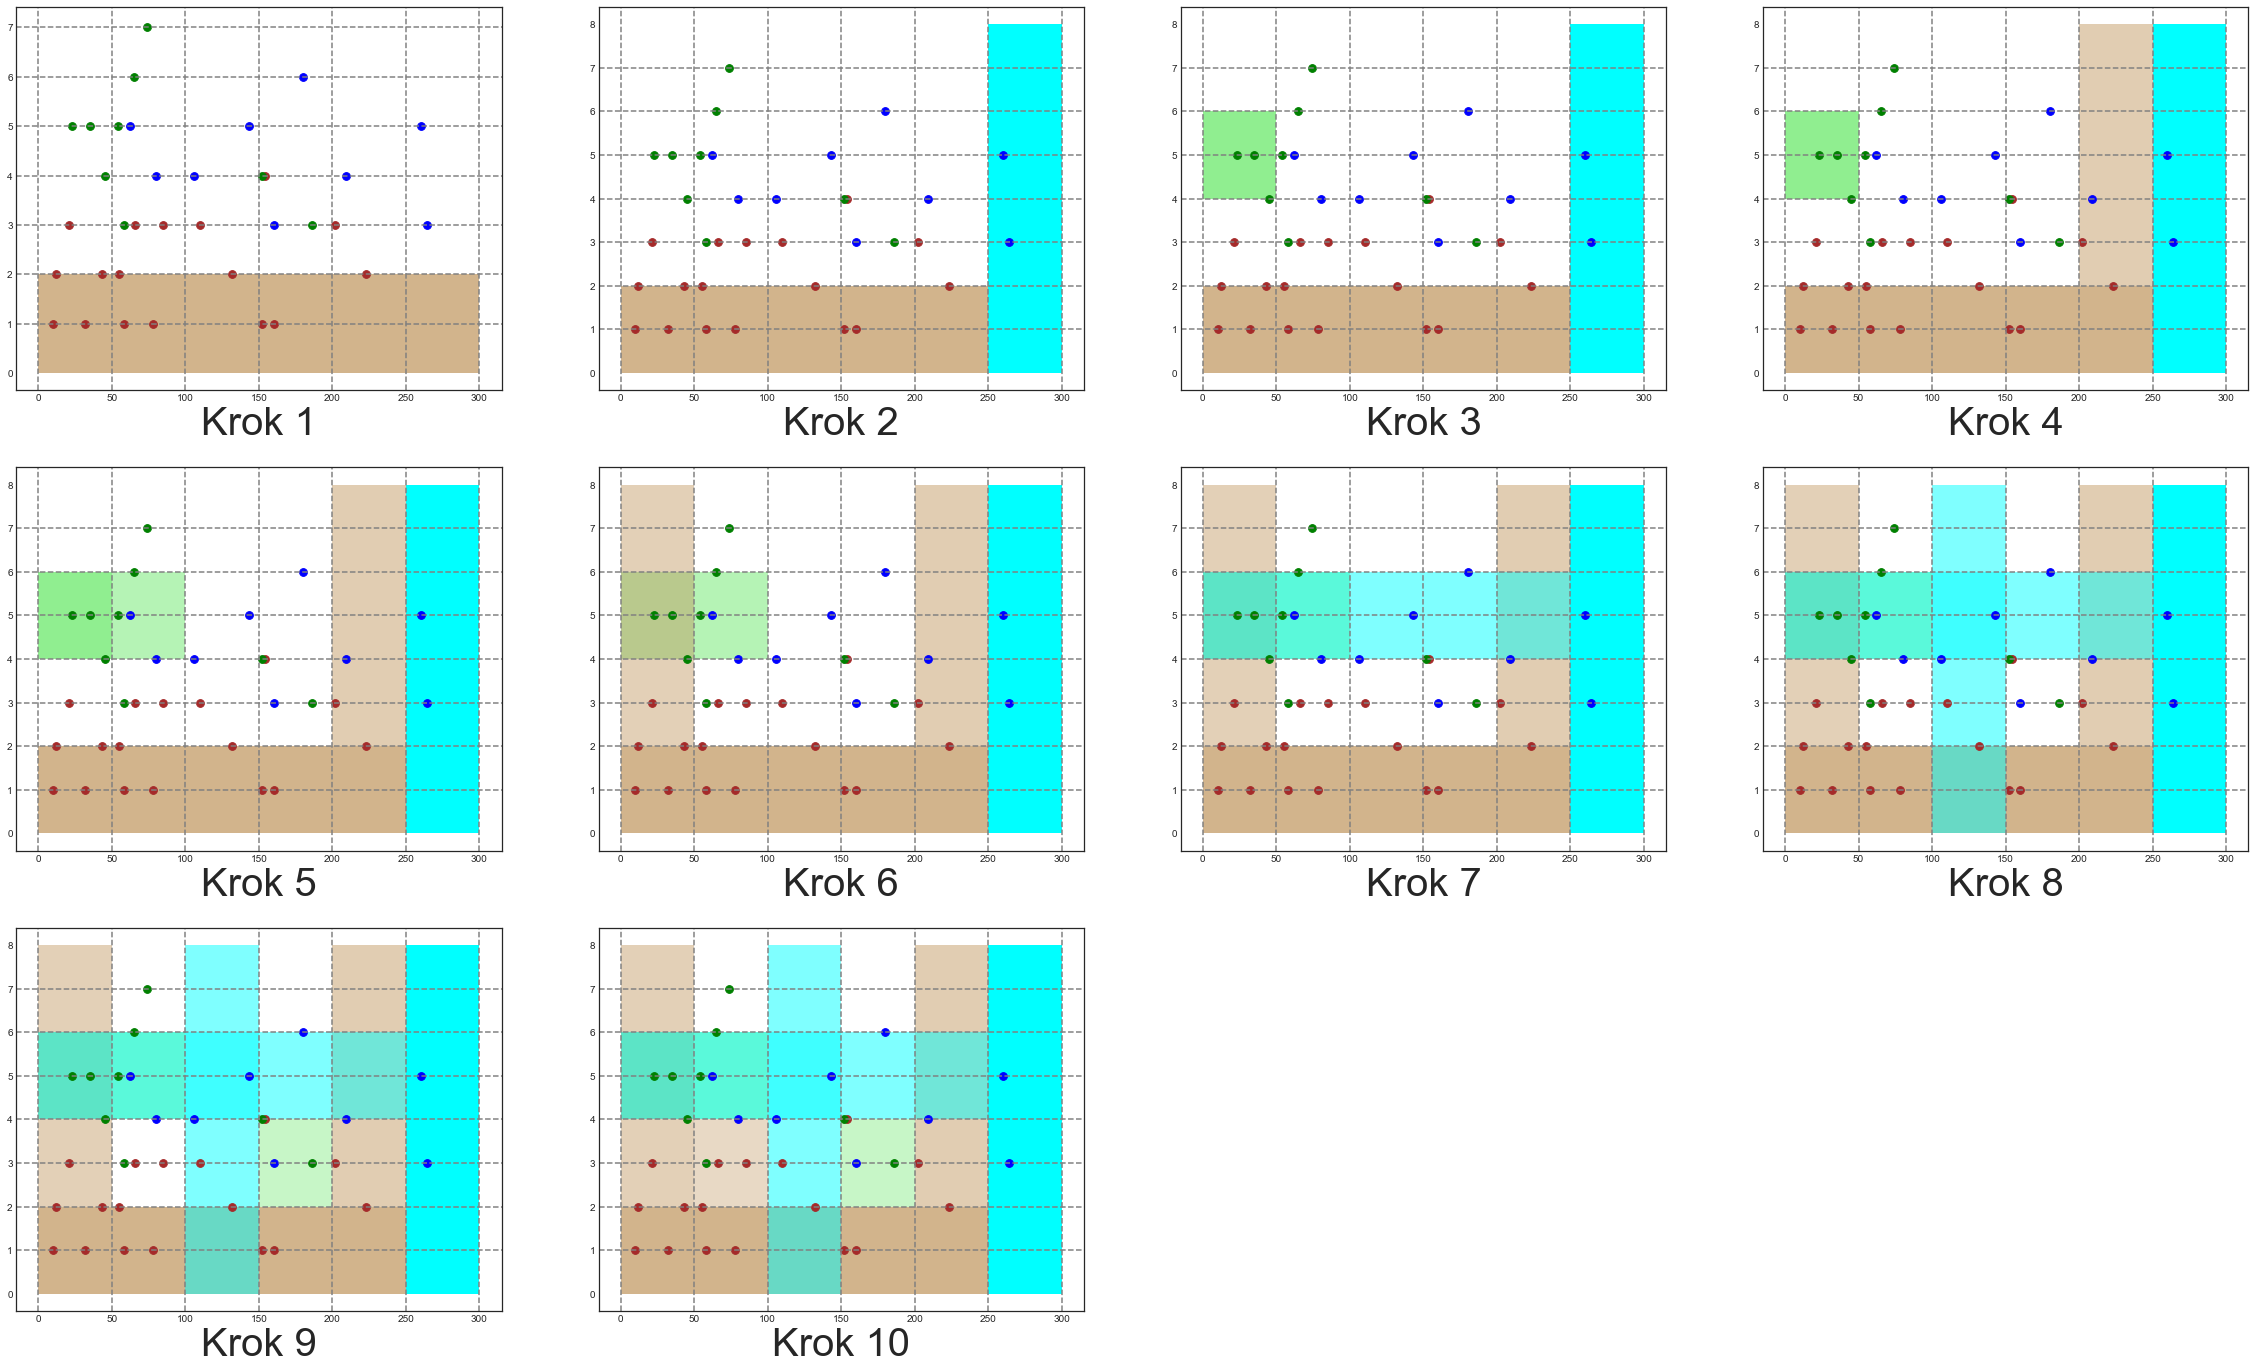

In [11]:
clfm1 = M1Algorithm(rules, transactionDB).build()

fig, ax = plt.subplots(figsize=(40, 24))
for idx, r in enumerate(clfm1.rules):
    plt.subplot(3, 4, idx + 1)
    
    for rule in clfm1.rules[:idx+1]:
        plot_rule(rule, plt)
        
    #plot_rule(r, plt)
    
    for i in range(len(x_points)):
        plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)

    for i, n in enumerate(x):
        plt.axhline(y=y[i], color = "grey", linestyle="dashed")
        plt.axvline(x=x[i], color = "grey", linestyle="dashed")
    
    plt.xlabel("Krok {}".format(idx + 1), fontsize=40)
    
    
    
plt.savefig("../data/m1_rules.png")


In [12]:
len(clfm1.rules)

10

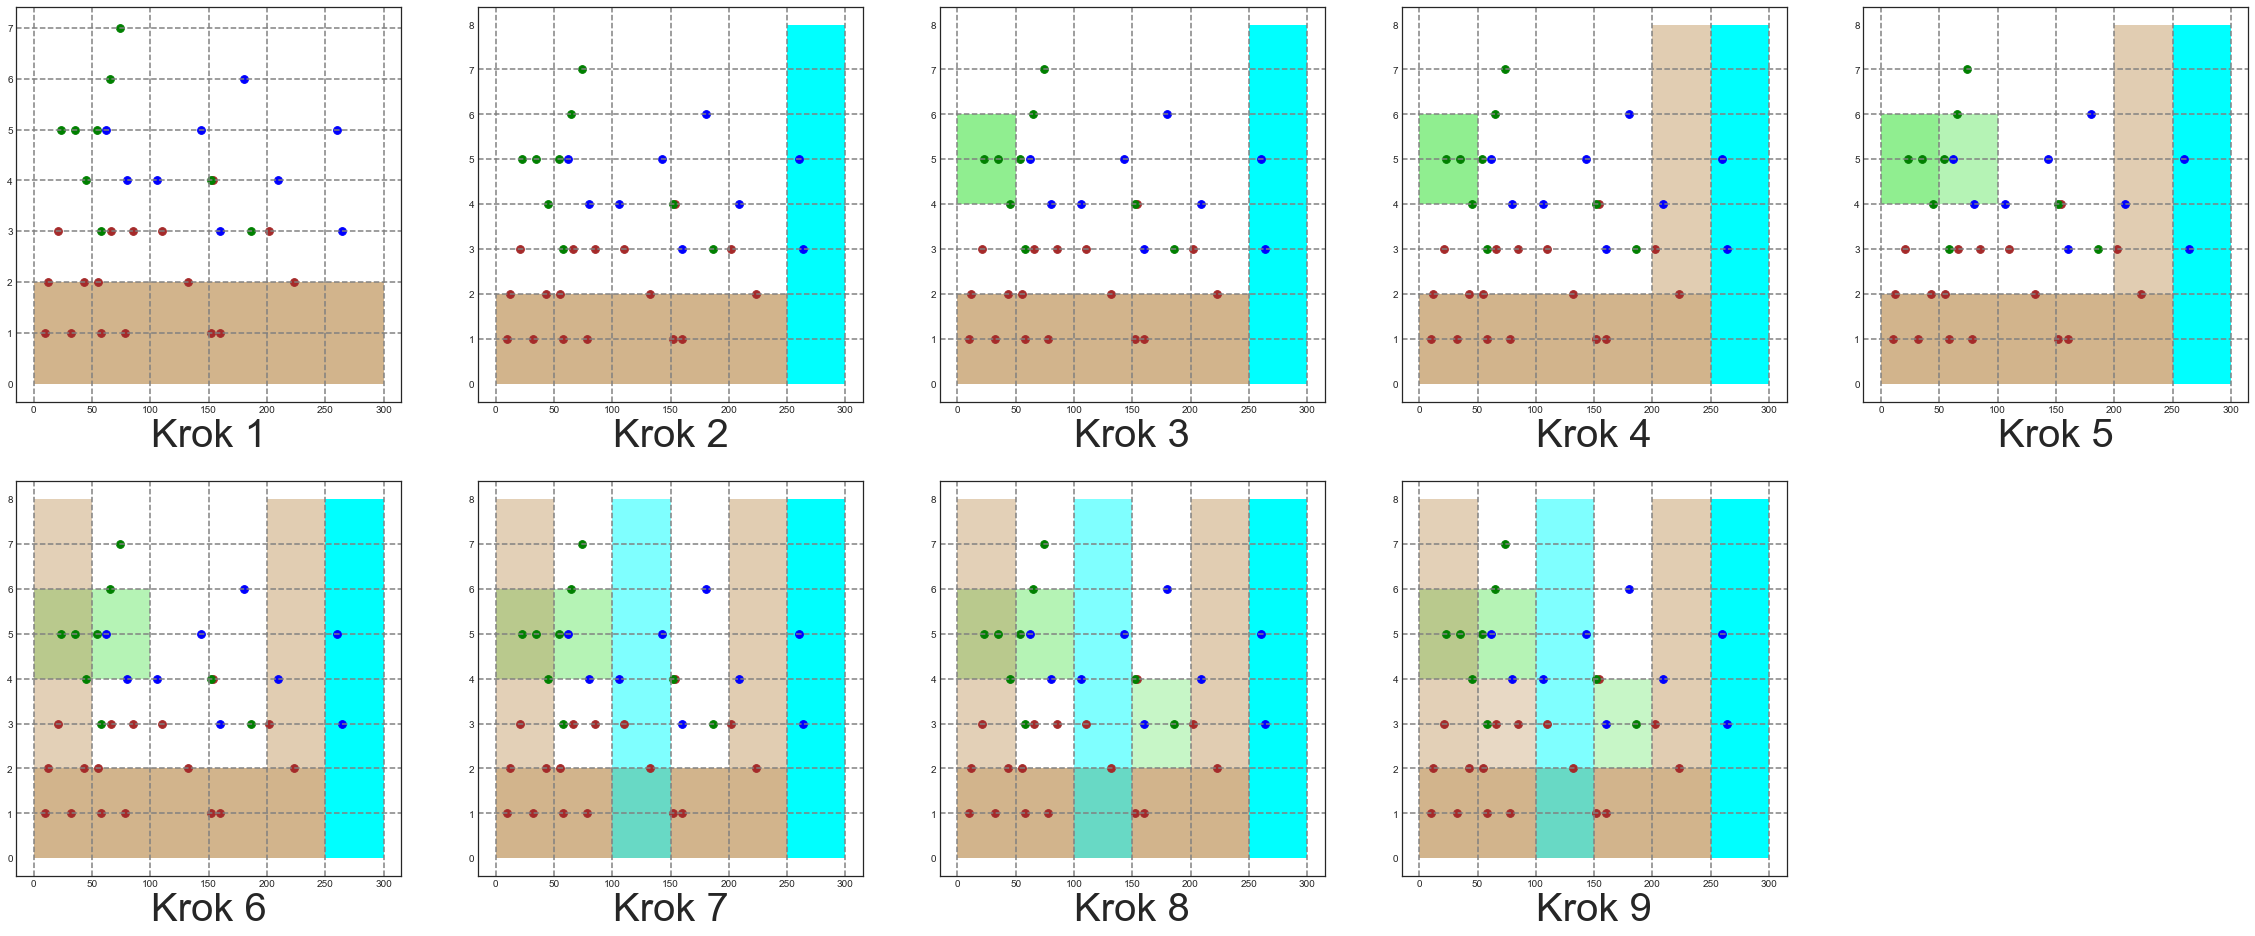

In [13]:
m2 = M2Algorithm(rules, transactionDB)
clfm2 = m2.build()


fig, ax = plt.subplots(figsize=(40, 16))
for idx, r in enumerate(clfm2.rules):
    plt.subplot(2, 5, idx + 1)
    
    for rule in clfm2.rules[:idx+1]:
        plot_rule(rule, plt)
    
    for i in range(len(x_points)):
        plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)

    for i, n in enumerate(x):
        plt.axhline(y=y[i], color = "grey", linestyle="dashed")
        plt.axvline(x=x[i], color = "grey", linestyle="dashed")
    
    plt.xlabel("Krok {}".format(idx + 1), fontsize=40)
    
    
    
plt.savefig("../data/m2_rules.png")


In [15]:
len(clfm2.rules)

9

In [16]:
clfm2.inspect().to_csv("../data/rulesframe.csv")

In [17]:
import sklearn.metrics as skmetrics

m1pred = clfm1.predict_all(transactionDB)
m2pred = clfm2.predict_all(transactionDB)

actual = transactionDB.classes


m1acc = skmetrics.accuracy_score(m1pred, actual)
m2acc = skmetrics.accuracy_score(m2pred, actual)


print("m1 acc", m1acc)
print("m2 acc", m2acc)

m1 acc 0.771428571429
m2 acc 0.742857142857


In [18]:
clfm1.rules == clfm2.rules

False